pls regression coef:- 
 [[ 56.06582586   6.57802448  78.08119378  20.87708994  71.80321931
    0.37489981  45.60674025  47.17872626  10.49539008  32.94983826]
 [ 27.73301163  69.01083143  75.06344932  41.55836277  65.65309122
  -23.88572429  20.39395926  55.58343191  41.37947023  -3.03735328]]
pls regression r2 score:- 
 0.9428718650719321
x_c shape:-  (60, 2)
y_c shape:-  (60, 2)
cca shape (x):-  (60, 2)
cca shape (y):-  (60, 2)


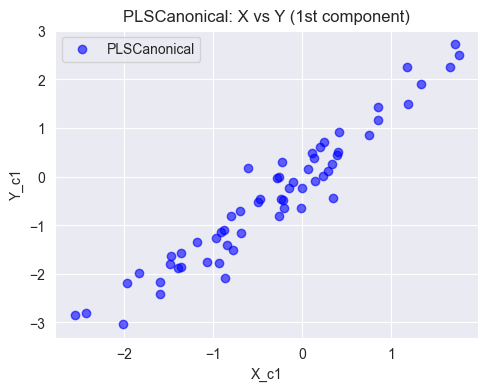

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import CCA,PLSCanonical,PLSRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split


X,y=make_regression(n_samples=200,n_features=10,n_targets=2,noise=0.1,random_state=42)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

pls=PLSRegression(n_components=2)
pls.fit(X_train,y_train)
pls_pred=pls.predict(X_test)

print('pls regression coef:- \n',pls.coef_)
print('pls regression r2 score:- \n',pls.score(X_test,y_test))

# pls canonical

plsc=PLSCanonical(n_components=2)
plsc.fit(X_train,y_train)

X_c,y_c=plsc.transform(X_test,y_test)
print('x_c shape:- ',X_c.shape)
print('y_c shape:- ',y_c.shape)

## canonical correlation analysis
cca=CCA(n_components=2)
cca.fit(X_train,y_train)
X_cc,y_cc =cca.transform(X_test,y_test)

print('cca shape (x):- ',X_cc.shape)
print('cca shape (y):- ',y_cc.shape)


# visulization

plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.scatter(X_c[:, 0], y_c[:, 0], c='blue', alpha=0.6, label="PLSCanonical")
plt.title("PLSCanonical: X vs Y (1st component)")
plt.xlabel("X_c1")
plt.ylabel("Y_c1")
plt.legend()



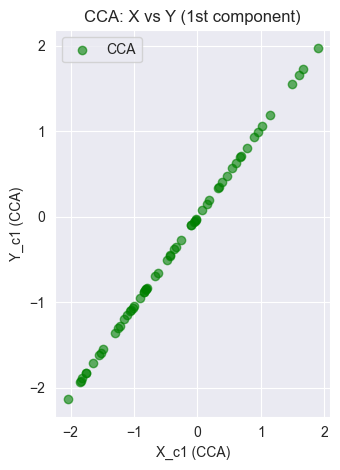

In [19]:
plt.subplot(1, 2, 2)
plt.scatter(X_cc[:, 0], y_cc[:, 0], c='green', alpha=0.6, label="CCA")
plt.title("CCA: X vs Y (1st component)")
plt.xlabel("X_c1 (CCA)")
plt.ylabel("Y_c1 (CCA)")
plt.legend()

plt.tight_layout()
plt.show()